In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv('weather.csv')
#data.head()

In [3]:
data = data.rename({"Total Precip (mm)": "Rain"}, axis = 'columns')
data.shape

(366, 31)

In [4]:
# Remove rows with missing target, separate target from predictors
data.dropna(axis=0, subset=['Rain'], inplace=True)
# Select target
y = data.Rain
# Training dataset
X = data.drop(['Rain'], axis=1)

#Remove all object types and keep numbers for simplicity
#X = X.select_dtypes(exclude=['object'])

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)


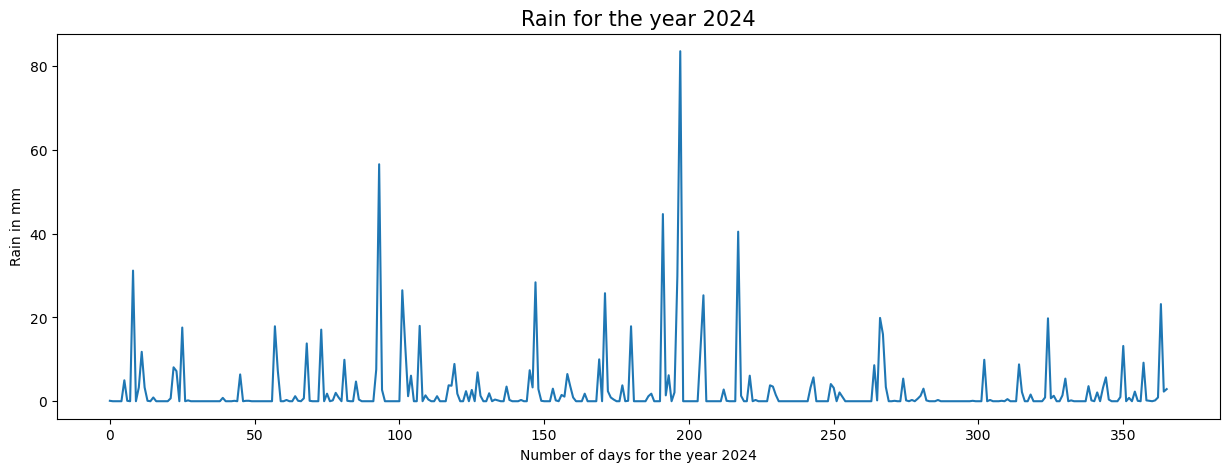

In [5]:

#Plot raw data
plt.figure(figsize=(15, 5))
plt.plot(data['Rain'])
plt.title('Rain for the year 2024', fontsize=15)
plt.ylabel('Rain in mm')
plt.xlabel('Number of days for the year 2024')
plt.show()


In [6]:

# Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Verification - Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
#print(missing_val_count_by_column[missing_val_count_by_column > 0])
removed_columns = missing_val_count_by_column[missing_val_count_by_column > 10]
#print (removed_columns)

# Dropping columns with no values or values with sum more than 10, as these data percentage missing is more than 20%
reduced_X_train = X_train.drop(removed_columns.keys(), axis=1)
reduced_X_valid = X_valid.drop(removed_columns.keys(), axis=1)


(290, 30)


In [7]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in reduced_X_train.columns if reduced_X_train[cname].nunique() < 366 and 
                        reduced_X_train[cname].dtype == "object"]


# Select numerical columns
numerical_cols = [cname for cname in reduced_X_train.columns if reduced_X_train[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
reduced_X_train = reduced_X_train[my_cols].copy()
reduced_X_valid = reduced_X_valid[my_cols].copy()

# Define Preprocessing Steps
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

print(my_cols)

['Station Name', 'Date/Time', 'Dir of Max Gust Flag', 'Spd of Max Gust Flag', 'Longitude (x)', 'Latitude (y)', 'Climate ID', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)']


In [8]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)


In [10]:
# Prediction test for 2025
X_final_test = pd.read_csv('weather_2025.csv')
X_final_test = data.rename({"Total Precip (mm)": "Rain"}, axis = 'columns')
#X_final_test.head()


In [11]:

final_predictions = my_pipeline.predict(X_final_test)
#print(final_predictions)
output = pd.DataFrame({'Date/Time': X_final_test['Date/Time'], 'Rain_Predicted': final_predictions})
output.head()

,Date/Time,Rain_Predicted
0,2024-01-01,0.051
1,2024-01-02,0.001
2,2024-01-03,0.000
3,2024-01-04,0.015
4,2024-01-05,0.001


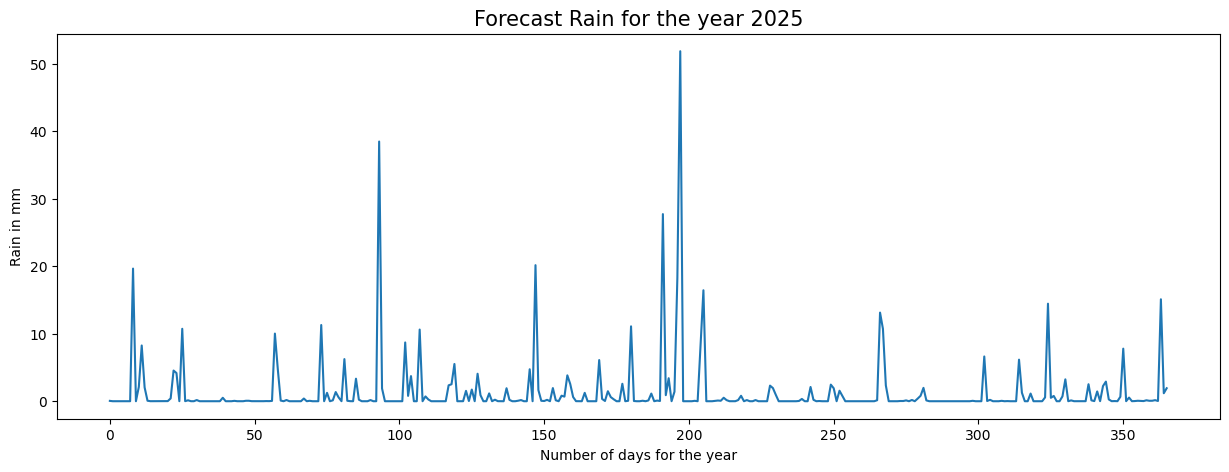

In [12]:
#Plot raw data
plt.figure(figsize=(15, 5))
plt.plot(output['Rain_Predicted'])
plt.title('Forecast Rain for the year 2025', fontsize=15)
plt.ylabel('Rain in mm')
plt.xlabel('Number of days for the year')
plt.show()


In [13]:
analysis_table = pd.concat([data['Date/Time'], y,output],axis=1)


In [14]:
analysis_table.columns=['Date 2024','Rain', 'Date 2025', 'Rain_Predicted']
analysis_table

,Date 2024,Rain,Date 2025,Rain_Predicted
0,2024-01-01,0.1,2024-01-01,0.051
1,2024-01-02,0.0,2024-01-02,0.001
2,2024-01-03,0.0,2024-01-03,0.000
3,2024-01-04,0.0,2024-01-04,0.015
4,2024-01-05,0.0,2024-01-05,0.001
...,...,...,...,...
361,2024-12-27,0.2,2024-12-27,0.157
362,2024-12-28,0.9,2024-12-28,0.035
363,2024-12-29,23.2,2024-12-29,15.107
364,2024-12-30,2.3,2024-12-30,1.183


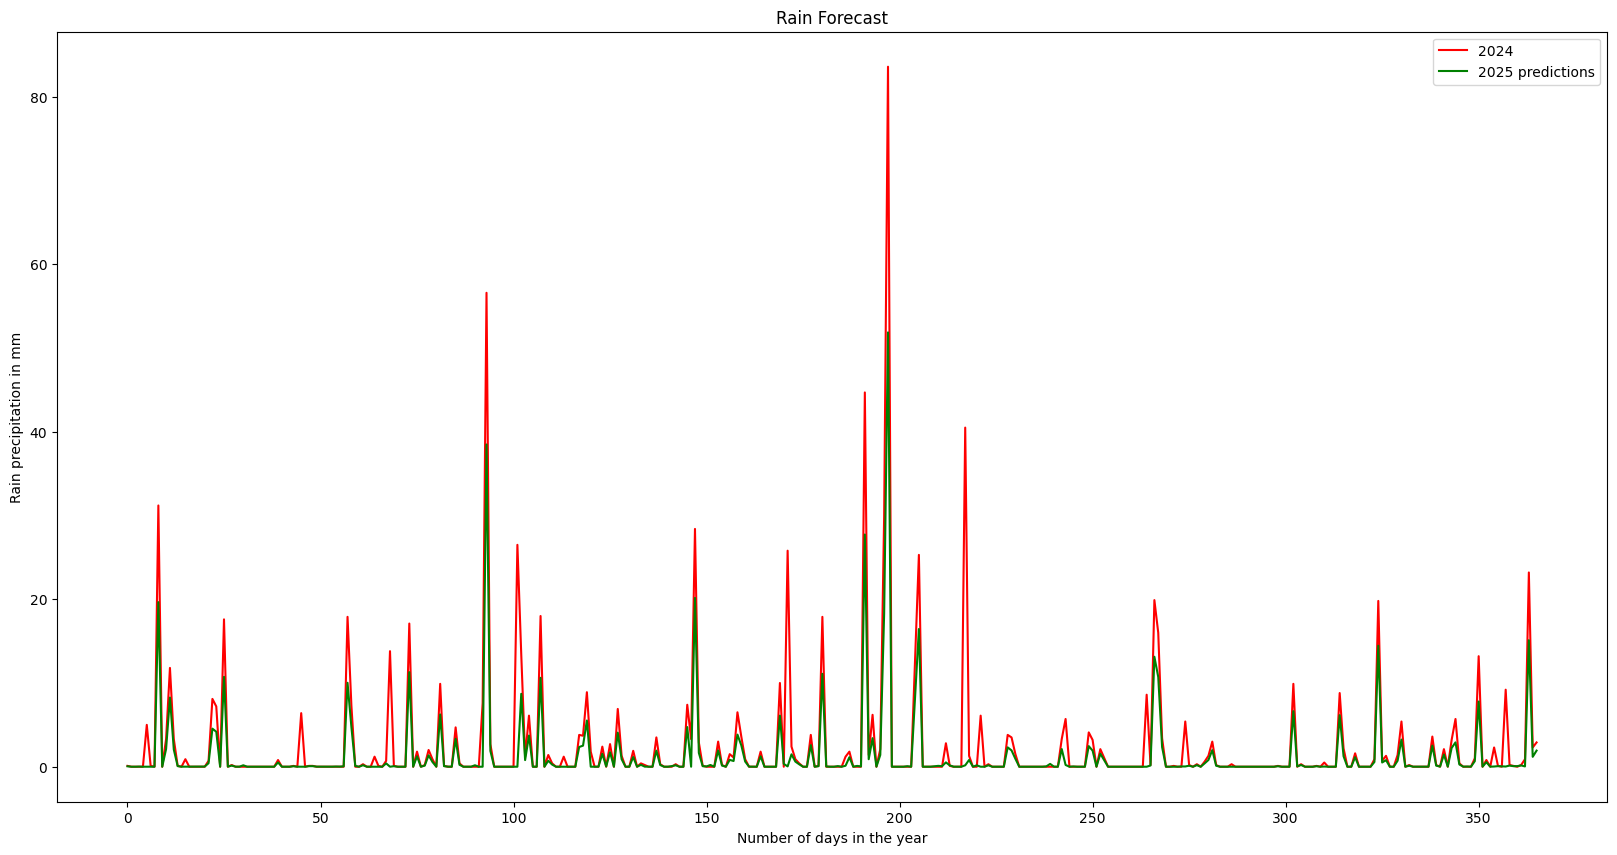

In [19]:
# Plotting both the curves simultaneously
Date_range = data.Month []
plt.figure(figsize=(20, 10))
plt.plot(data['Rain'], color='r', label='2024')
plt.plot(output['Rain_Predicted'], color='g', label='2025 predictions')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of days in the year")
plt.ylabel("Rain precipitation in mm")
plt.title("Rain Forecast")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()